In [1]:
import numpy as np
import matplotlib.pyplot as plt

class ADALINE:
    def __init__(self, R, S, alfa):
        self.W = np.random.uniform(-1, 1, S*(R+1)).reshape((S, R+1))
        self.alfa = alfa
        
    def train(self, X, T, epocas):
        
        bias = -np.ones((np.shape(X)[0], 1))
        X_a = np.concatenate([X, bias], axis = 1)
        
        self.errores = []
        E = 1.0
        
        epoch = 0
        for i in range(epocas):
            E = 0
            for x, t in zip(X_a, T):
                
                A = np.matmul(self.W, x)
                delta = A - t
                delta_p = -self.alfa*np.matmul(delta[:, None], np.transpose(x[:, None]))
                self.W += delta_p
                E += (1/2)*(delta*delta)
                
            E /= np.shape(X)[0]
            self.errores.append(E)
                    
    def classify(self, x):
        x_a = np.concatenate([x, [-1]])
        A = np.matmul(self.W, x_a)
        return A

Inicial: [[ 0.86041471 -0.23408171 -0.44840713]]


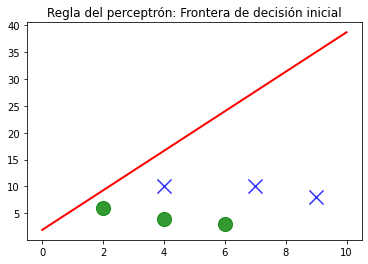

In [11]:
#X = [[0, 0], [0, 1], [1, 0], [1, 1]]
#T = [[-1], [1], [1], [1]]

X = np.array([[2.0, 6.0], [4.0, 4.0], [6.0, 3.0], [4.0, 10.0], [7.0, 10.0], [9.0, 8.0]])
T = np.array([[-1.0], [-1.0], [-1.0], [1.0], [1.0], [1.0]])

ada_1 = ADALINE(np.shape(X)[1], np.shape(T)[1], 0.01)

x1 = np.linspace(0, 10)
x2 = (ada_1.W[0, 2] / ada_1.W[0, 1]) - (x1 * ada_1.W[0, 0] / ada_1.W[0, 1])
plt.figure(1)
plt.plot(x1, x2, 'red', linewidth = 2)

for x, t in zip(X, T):
    if t[0] <= 0:
        plt.scatter(x[0], x[1], color = 'g', s = 200, marker = 'o', alpha = 0.8)
    else:
        plt.scatter(x[0], x[1], color = 'b', s = 200, marker = 'x', alpha = 0.8)

print(f"Inicial: {ada_1.W}")
plt.title('Regla del perceptrón: Frontera de decisión inicial')
plt.show()

Inicial: [[ 0.86041471 -0.23408171 -0.44840713]]
Final: [[0.15927411 0.26116447 2.29165524]]


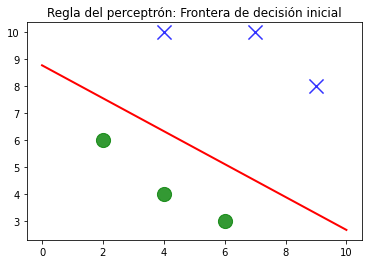

In [12]:
print(f"Inicial: {ada_1.W}")
ada_1.train(X, T, 300)
print(f"Final: {ada_1.W}")

x2 = (ada_1.W[0, 2] / ada_1.W[0, 1]) - (x1 * ada_1.W[0, 0] / ada_1.W[0, 1])
plt.figure(1)
plt.plot(x1, x2, 'red', linewidth = 2)

for x, t in zip(X, T):
    if t[0] <= 0:
        plt.scatter(x[0], x[1], color = 'g', s = 200, marker = 'o', alpha = 0.8)
    else:
        plt.scatter(x[0], x[1], color = 'b', s = 200, marker = 'x', alpha = 0.8)

plt.title('Regla del perceptrón: Frontera de decisión inicial')
plt.show()

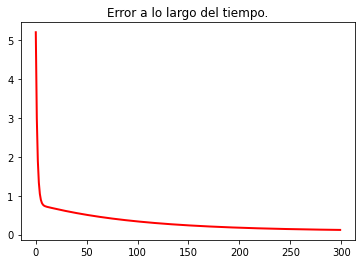

In [13]:
errores = []
for e in ada_1.errores:
    errores.append(e[0])

e = np.array(errores)

plt.figure(1)
plt.plot(e, 'red', linewidth = 2)

plt.title('Error a lo largo del tiempo.')
plt.show()


Result class for [5 5]: [-0.18946234]
Result class for [6 8]: [0.75330519]


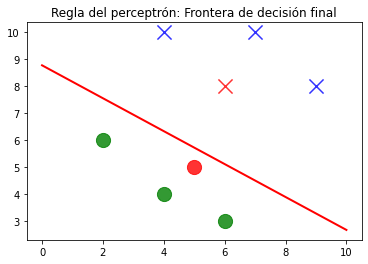

In [14]:
test_data = np.array([[5, 5], [6, 8]])

for i in range(np.shape(test_data)[0]):
    pattern_class = ada_1.classify(test_data[i])
    print(f"Result class for {test_data[i]}: {pattern_class}")
    
    if pattern_class <= 0:
        plt.scatter(test_data[i][0], test_data[i][1], color = 'r', s = 200, marker = 'o', alpha = 0.8)
    else:
        plt.scatter(test_data[i][0], test_data[i][1], color = 'r', s = 200, marker = 'x', alpha = 0.8)    
    

for x, t in zip(X, T):
    if t[0] <= 0:
        plt.scatter(x[0], x[1], color = 'g', s = 200, marker = 'o', alpha = 0.8)
    else:
        plt.scatter(x[0], x[1], color = 'b', s = 200, marker = 'x', alpha = 0.8)    
    
x2 = (ada_1.W[0, 2] / ada_1.W[0, 1]) - (x1 * ada_1.W[0, 0] / ada_1.W[0, 1])
plt.figure(1)
plt.plot(x1, x2, 'red', linewidth = 2)    
    
plt.title('Regla del perceptrón: Frontera de decisión final')
plt.show()    